## <i> <span style='color:red'>CLUSTERING:AIRLINES DATA</i></span>

### PROBLEM STATMENT:Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters.To draw the inferences from the clusters obtained.

#### Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import power_transform

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#### Reading the csv file

In [2]:
Airlines = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
Airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [4]:
# Dropping the unnecessary columns from the data frame
Airlines1 = Airlines.drop('ID#', axis=1)

In [5]:
Airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


#### checking the basic info about the data

In [6]:
Airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
Airlines1[Airlines.duplicated(keep = False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


### Boxplot-To check the outliers

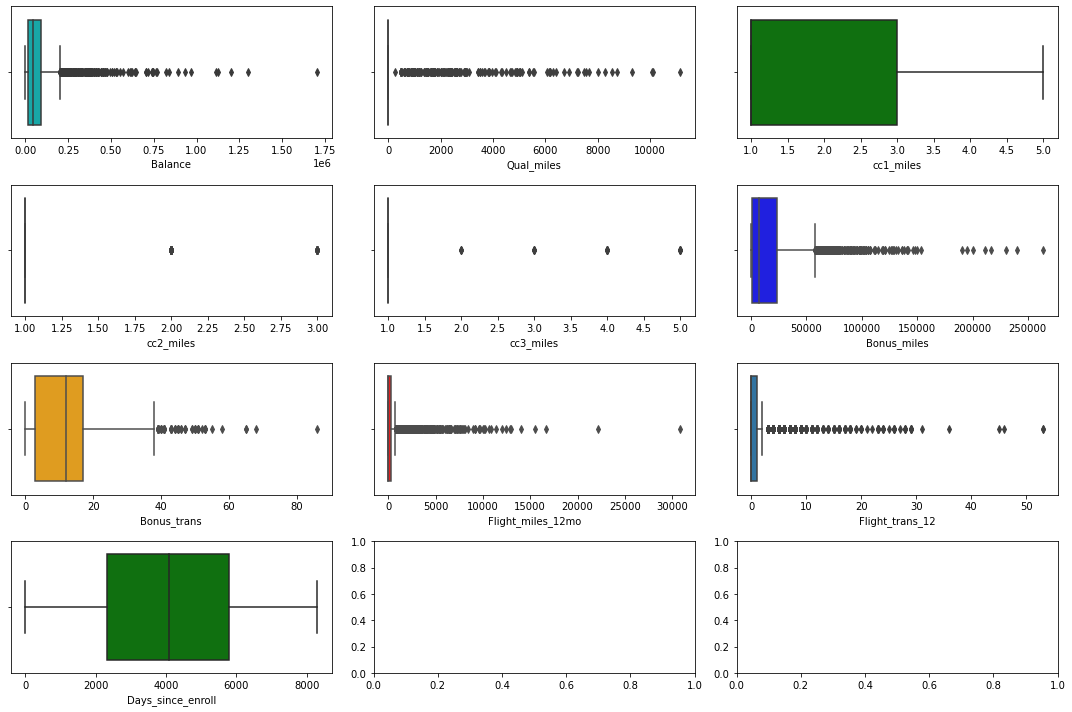

In [8]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(Airlines1.Balance, ax=ax[0,0],color='c')
sns.boxplot(Airlines1.Qual_miles, ax=ax[0,1])
sns.boxplot(Airlines1.cc1_miles, ax=ax[0,2],color='g')
sns.boxplot(Airlines1.cc2_miles, ax=ax[1,0])
sns.boxplot(Airlines1.cc3_miles, ax=ax[1,1])
sns.boxplot(Airlines1.Bonus_miles, ax=ax[1,2],color='b')
sns.boxplot(Airlines1.Bonus_trans, ax=ax[2,0],color='orange')
sns.boxplot(Airlines1.Flight_miles_12mo, ax=ax[2,1],color='red')
sns.boxplot(Airlines1. Flight_trans_12, ax=ax[2,2])
sns.boxplot(Airlines1.Days_since_enroll, ax=ax[3,0],color='green')
plt.tight_layout()
plt.show()

###  visualization using histogram to check whether it is normally distributed or not

In [58]:
fig, ax = plt.subplots(4, 3, figsize=(15,15))
sns.histplot(Airlines1.Balance, ax=ax[0,0],color='g')
sns.histplot(Airlines1.Qual_miles, ax=ax[0,1],color='red')
sns.histplot(Airlines1.cc1_miles, ax=ax[0,2],color='orange')
sns.histplot(Airlines1.cc2_miles, ax=ax[1,0],color='g')
sns.histplot(Airlines1.cc3_miles, ax=ax[1,1],color='red')
sns.histplot(Airlines1.Bonus_miles, ax=ax[1,2],color='orange')
sns.histplot(Airlines1.Bonus_trans, ax=ax[2,0],color='g')
sns.histplot(Airlines1.Flight_miles_12mo, ax=ax[2,1],color='red')
sns.histplot(Airlines1. Flight_trans_12, ax=ax[2,2],color='orange')
sns.histplot(Airlines1.Days_since_enroll, ax=ax[3,0],,color='red')
sns.histplot(Airlines1["Award?"] , ax=ax[3,1],,color='g')
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-58-0d0b41ae5d3c>, line 11)

### Standardisation using power transformation

In [10]:
Airlines2 = Airlines1[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]].values
Airlines2_transformed = power_transform(Airlines2, method='yeo-johnson')

In [11]:
Airlines2=pd.DataFrame(Airlines2_transformed,columns=["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]) 
Airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,0.153811,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.727886,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,0.795077,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,1.446453,1.081077,-1.365977,-0.766919


### Checking the normal distribution of the data, after Power transformation

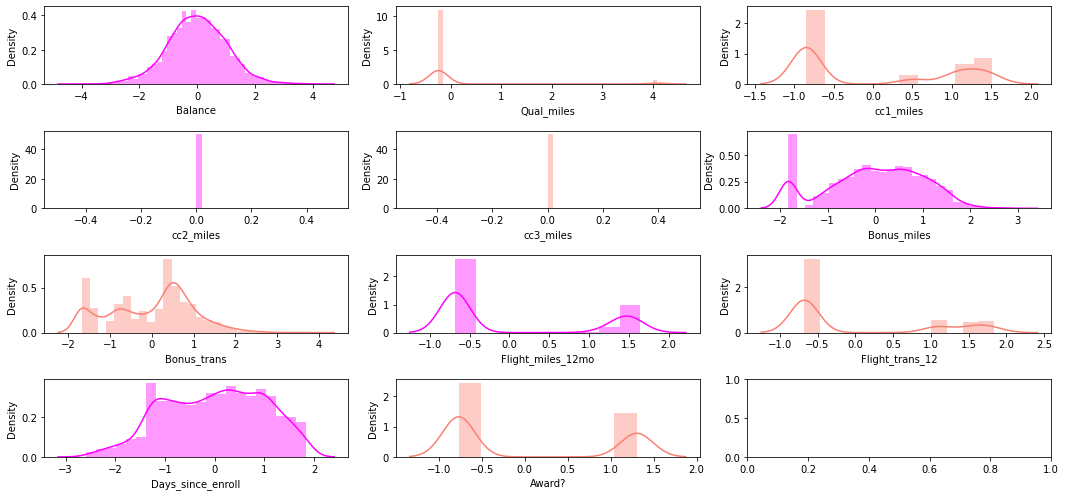

In [60]:
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(Airlines2.Balance, ax=ax[0,0],color='magenta')
sns.distplot(Airlines2.Qual_miles, ax=ax[0,1],color='salmon')
sns.distplot(Airlines2.cc1_miles, ax=ax[0,2],color='salmon')
sns.distplot(Airlines2.cc2_miles, ax=ax[1,0],color='magenta')
sns.distplot(Airlines2.cc3_miles, ax=ax[1,1],color='salmon')
sns.distplot(Airlines2.Bonus_miles, ax=ax[1,2],color='magenta')
sns.distplot(Airlines2.Bonus_trans, ax=ax[2,0],color='salmon')
sns.distplot(Airlines2.Flight_miles_12mo, ax=ax[2,1],color='magenta')
sns.distplot(Airlines2.Flight_trans_12, ax=ax[2,2],color='salmon')
sns.distplot(Airlines2.Days_since_enroll, ax=ax[3,0],color='magenta')
sns.distplot(Airlines2["Award?"] , ax=ax[3,1],color='salmon')
plt.tight_layout()
plt.show()

## Hierarchical clustering methods 
### Average linkage method

Text(0.5, 1.0, 'Dendogram')

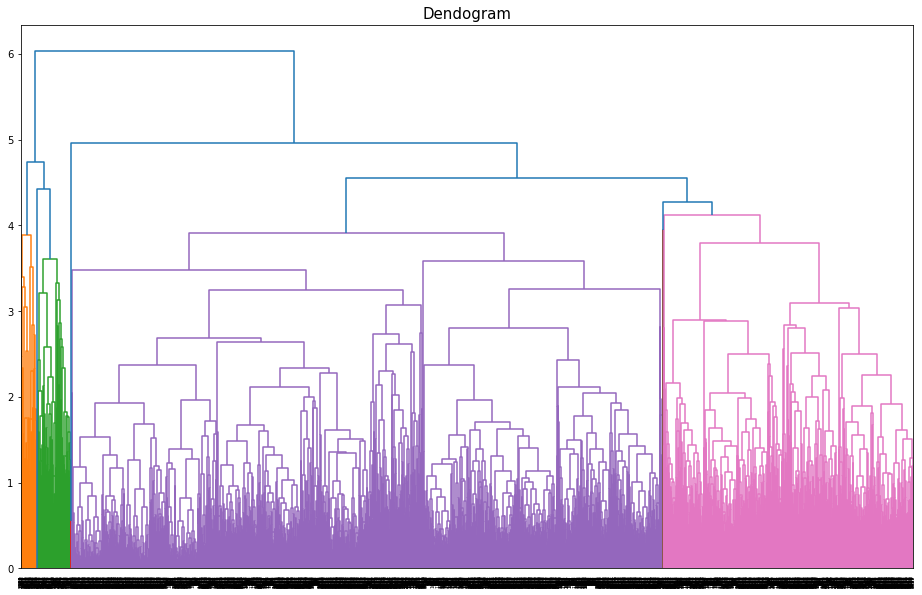

In [62]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='average'))
plt.title("Dendogram",size=15)

In [14]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

### Model fitting

In [15]:
y_hc1 = hc1.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [16]:
# Creating a new column
Airlines['cluster'] = y_hc1

In [17]:
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
1,1,1891.090828,104075.087266,0.000000,2.290294,1.017809,1.016919,23897.578807,15.159394,1291.878896,3.845058,4368.430098,0.547640
2,2,1425.000000,125.000000,0.000000,1.000000,1.000000,1.000000,125.000000,1.000000,125.000000,1.000000,5163.500000,0.000000
3,3,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
4,4,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903


### Checking the no.of elements in each cluster

In [18]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 151

cluster 1
Total Members: 1123

cluster 2
Total Members: 2

cluster 3
Total Members: 75

cluster 4
Total Members: 2648



### Centroid(ward) linkage method

Text(0.5, 1.0, 'Dendogram')

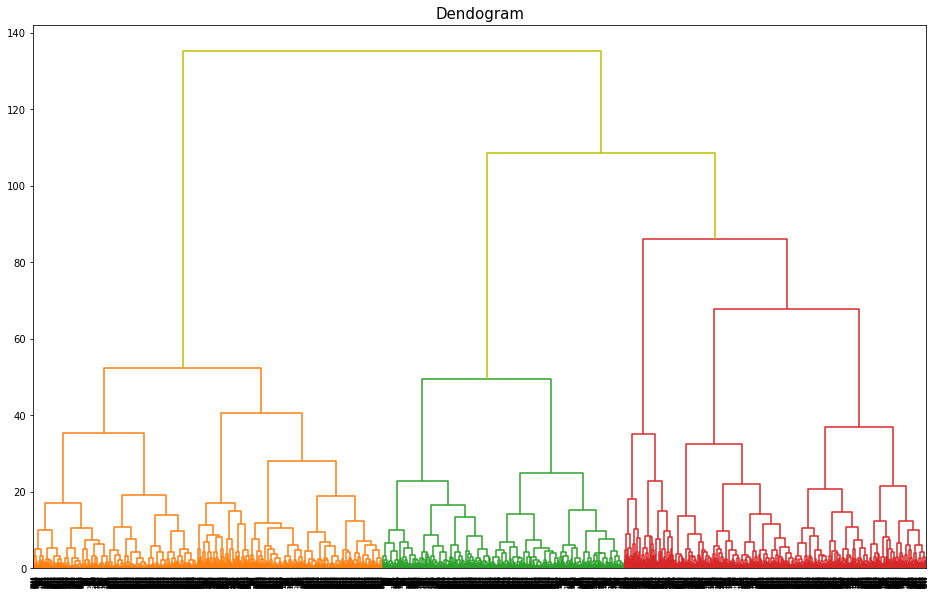

In [19]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='ward'),above_threshold_color='y')
plt.title("Dendogram",size=15)

In [20]:
# Creating Cluster using centroid linkage method
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

### Model fitting

In [21]:
y_hc2 = hc2.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

In [22]:
Airlines['cluster'] = y_hc2

In [23]:
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2270.985322,33419.559030,0.000000,1.000000,1.022336,1.005105,2837.693044,5.463944,0.000000,0.000000,3631.267390,0.151883
1,1,2113.270270,77788.952703,0.000000,1.000000,1.030405,1.000000,6038.932432,8.885135,1403.608108,4.155405,3981.564189,0.429054
2,2,1802.231267,87897.735430,0.000000,3.331175,1.000925,1.018501,29432.774283,15.990749,0.000000,0.000000,4513.629972,0.445883
3,3,1875.539823,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,1642.568480,132880.887430,0.000000,3.718574,1.003752,1.035647,43643.870544,22.075047,1163.403377,3.489681,4801.103189,0.677298


### Viewing how many categories are included in each cluster 

In [24]:
# Checking how many categories are included in each cluster 
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1567

cluster 1
Total Members: 592

cluster 2
Total Members: 1081

cluster 3
Total Members: 226

cluster 4
Total Members: 533



### Complete linkage method

Text(0.5, 1.0, 'Dendogram')

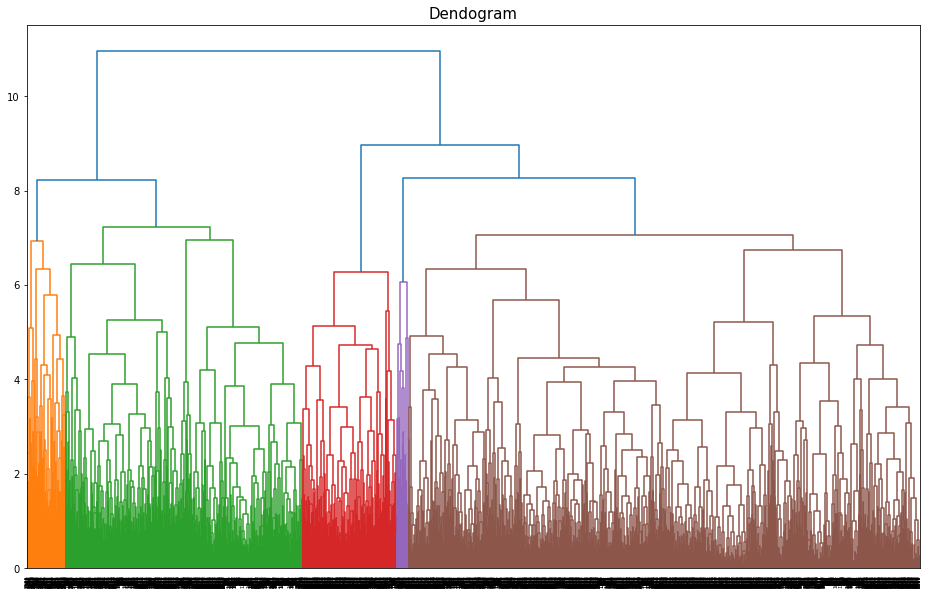

In [25]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='complete'))
plt.title("Dendogram",size=15)

In [54]:
# Creatig Cluster using complete linkage method
hc3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [27]:
y_hc3 = hc3.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [28]:
Airlines['cluster'] = y_hc3

In [29]:
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1475.911404,145838.029218,0.000000,3.541942,1.004713,1.032045,39928.083883,19.713478,809.139491,2.377003,5095.663525,0.553252
1,1,2168.733392,39231.260927,0.000000,1.506119,1.016608,1.005682,7506.878497,7.910839,53.164773,0.161713,3831.724213,0.220717
2,2,2607.044811,46620.754717,0.000000,1.268868,1.030660,1.000000,8399.268868,9.099057,1110.594340,3.367925,3094.386792,0.573113
3,3,2367.264151,46202.320755,2805.528302,1.000000,1.000000,1.000000,2909.528302,3.962264,188.245283,0.566038,3446.471698,0.264151
4,4,1724.895954,159656.138728,2471.797688,2.549133,1.011561,1.011561,30678.092486,19.144509,2189.341040,6.606936,4635.560694,0.763006


### Checking  how many categories are included in each cluster 

In [30]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1061

cluster 1
Total Members: 2288

cluster 2
Total Members: 424

cluster 3
Total Members: 53

cluster 4
Total Members: 173



### Single linkage method

Text(0.5, 1.0, 'Dendogram')

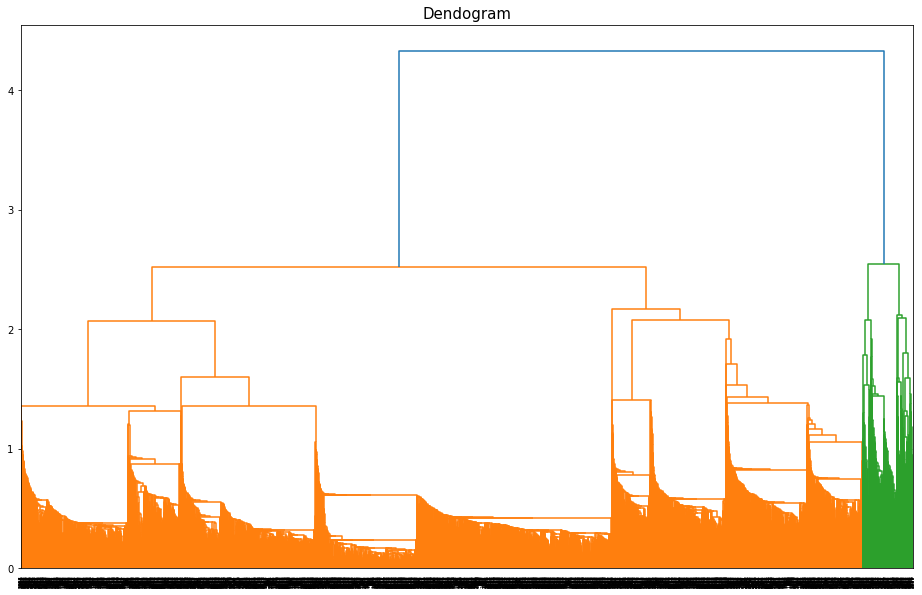

In [31]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='single'))
plt.title("Dendogram",size=15)

### Creating a Cluster using single linkage method, fitting the data on the model and creating a new cluster column with cluster labels

In [32]:
hc4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
y_hc4 = hc4.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])
Airlines['cluster'] = y_hc4
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
1,1,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
2,2,3018.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000
3,3,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903
4,4,1889.258897,103982.716192,0.000000,2.289146,1.017794,1.016904,23871.654804,15.131673,1289.069395,3.838968,4370.880783,0.546263


In [33]:
# Viewing how many categories are included in each cluster 
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 75

cluster 1
Total Members: 151

cluster 2
Total Members: 1

cluster 3
Total Members: 2648

cluster 4
Total Members: 1124



### K-means clustering 

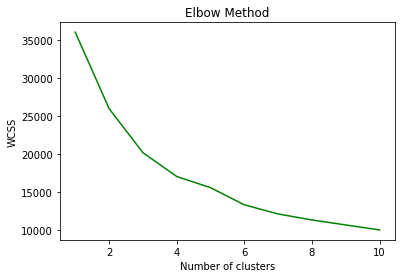

In [63]:
# Plotting elbow curve 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Airlines2_transformed)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,color='green')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Creating  Kmeans with 5 clusters

In [35]:
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(Airlines2_transformed)

KMeans(n_clusters=5, random_state=42)

In [36]:
KM_label=clusters_new.labels_
Airlines['cluster'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[ 0.37403024, -0.2447433 ,  0.91648206,  0.        ,  0.        ,
         0.71948703,  0.59467256, -0.68330804, -0.67497033,  0.23678884,
         0.17949748],
       [ 0.01778979, -0.2447433 , -0.81928373,  0.        ,  0.        ,
        -0.27778826, -0.27028379,  1.45194998,  1.43655403, -0.09405415,
         0.07368197],
       [-0.67430137, -0.23302299, -0.83561528,  0.        ,  0.        ,
        -0.90603367, -0.81736231, -0.6820875 , -0.67378221, -0.30771151,
        -0.51051656],
       [ 0.75398821, -0.2447433 ,  1.11731051,  0.        ,  0.        ,
         1.03767038,  1.04636296,  1.45623817,  1.40977901,  0.35785773,
         0.67137144],
       [ 0.59561724,  4.08591363,  0.06270738,  0.        ,  0.        ,
         0.37140654,  0.40074101,  0.79577474,  0.85126029,  0.15196421,
         0.59498281]])

In [37]:
A=Airlines .iloc[:,1:].groupby('cluster').agg(['mean']).reset_index()

In [38]:
A

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,89496.876805,0.000000,3.132540,1.011045,1.023789,27984.887850,16.093458,0.000000,0.000000,4589.041631,0.457094
1,1,69243.130890,0.000000,1.020942,1.026178,1.000000,5429.420593,8.059337,1211.178010,3.598604,3907.469459,0.404887
2,2,28501.850271,8.262195,1.006775,1.015583,1.000000,2252.934282,4.679539,0.033875,0.000678,3506.721545,0.123306
3,3,140109.272232,0.000000,3.607985,1.009074,1.034483,43060.114338,22.517241,1373.820327,4.096189,4849.402904,0.695100
4,4,135354.193694,2541.076577,2.207207,1.009009,1.009009,24601.418919,15.864865,1751.049550,5.283784,4422.950450,0.657658


In [56]:
# Viewing  number of categories in each cluster
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1177

cluster 1
Total Members: 573

cluster 2
Total Members: 1476

cluster 3
Total Members: 551

cluster 4
Total Members: 222



### DBSCAN 

In [40]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(Airlines2)

DBSCAN(eps=0.8, min_samples=6)

In [41]:
dbscan.labels_

array([0, 0, 0, ..., 4, 6, 0], dtype=int64)

In [42]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])

In [43]:
cl

,cluster_db
0,0
1,0
2,0
3,0
4,1
...,...
3994,3
3995,5
3996,4
3997,6


In [44]:
Airlines3 = pd.concat([Airlines,cl],axis=1)

In [45]:
Airlines3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster_db
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,5
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,6


In [46]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


### Silhouette score

In [47]:
s1=(metrics.silhouette_score(Airlines2_transformed,y_hc1))
s1

0.24511194875209383

In [48]:
s2=(metrics.silhouette_score(Airlines2_transformed,y_hc2))
s2

0.3240550069814065

In [49]:
s3=(metrics.silhouette_score(Airlines2_transformed,y_hc3))
s3

0.19985213995606269

In [50]:
s4=(metrics.silhouette_score(Airlines2_transformed,y_hc4))
s4

0.2971406781364072

In [51]:
s5=(metrics.silhouette_score(Airlines2_transformed,clusters_new.labels_))
s5

0.32521670433834216

In [52]:
s6=(metrics.silhouette_score(Airlines2_transformed,Airlines3.cluster_db))
s6

0.2340657983934542

### Tabling using the models

In [53]:
t={'Model':['Average','Centrod','Complete','Single','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5,s6]
  }
t=pd.DataFrame(t)
t

,Model,Sillhouette score
0,Average,0.245112
1,Centrod,0.324055
2,Complete,0.199852
3,Single,0.297141
4,Kmeans,0.325217
5,DBScan,0.234066


## Inference:
### Based on the  silhoutte score it is evident that centroid linkage method and kmeans clustering gives the high value.Hierarchical cluster is way more complex to understand, in which centroid linkage gives a better result its silhouette score is similar to kmeans clustering. In heirarchical clustering, the other linkage methods have a biased clustering, showing that 70% data is belongs to only one cluster.  So we predict the result only with kmeans clustering.Using 5 clusters give better result .